<a href="https://colab.research.google.com/github/kyreedjordan/kyreedjordan/blob/main/Synthetic_fitness_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Objective: Determine which types of workout routines are most effective for client progress in terms of key metrics like weight loss, muscle gain, or cardiovascular improvement.

np.random.seed(42)

# number of clients
num_clients = 1000

# synthetic data
data = {
    'Client_ID': range(1, num_clients + 1),
    'Age': np.random.randint(18, 60, size=num_clients),
    'Gender': np.random.choice(['Male', 'Female'], size=num_clients),
    'Initial_Fitness_Level': np.random.choice(['Beginner', 'Intermediate', 'Advanced'], size=num_clients),
    'Workout_Type': np.random.choice(['HIIT', 'Cardio', 'Strength Training'], size=num_clients),
    'Workout_Duration': np.random.randint(30, 90, size=num_clients),  # Duration in minutes
    'Workout_Intensity': np.random.choice(['Low', 'Medium', 'High'], size=num_clients),
    'Attendance_Frequency': np.random.randint(1, 6, size=num_clients),  # Sessions per week
    'Initial_Weight': np.round(np.random.uniform(60, 120, size=num_clients), 1),  # Weight in kg
    'Final_Weight': np.round(np.random.uniform(60, 120, size=num_clients), 1),
    'Initial_Body_Fat_Percentage': np.round(np.random.uniform(15, 35, size=num_clients), 1),
    'Final_Body_Fat_Percentage': np.round(np.random.uniform(10, 30, size=num_clients), 1),
    'Initial_Muscle_Mass': np.round(np.random.uniform(20, 50, size=num_clients), 1),  # Muscle mass in kg
    'Final_Muscle_Mass': np.round(np.random.uniform(20, 50, size=num_clients), 1),
    'Initial_VO2_Max': np.round(np.random.uniform(30, 50, size=num_clients), 1),  # VO2 Max in ml/kg/min
    'Final_VO2_Max': np.round(np.random.uniform(30, 50, size=num_clients), 1)
}

df = pd.DataFrame(data)

df.head()


,Client_ID,Age,Gender,Initial_Fitness_Level,Workout_Type,Workout_Duration,Workout_Intensity,Attendance_Frequency,Initial_Weight,Final_Weight,Initial_Body_Fat_Percentage,Final_Body_Fat_Percentage,Initial_Muscle_Mass,Final_Muscle_Mass,Initial_VO2_Max,Final_VO2_Max
0,1,56,Male,Beginner,HIIT,63,High,5,76.4,97.9,28.0,11.8,37.5,34.1,32.2,31.4
1,2,46,Male,Beginner,Cardio,73,Low,1,114.7,61.5,30.6,24.6,49.6,47.5,41.5,45.8
2,3,32,Female,Beginner,Strength Training,33,High,3,65.9,103.2,30.3,16.9,39.1,31.6,30.5,42.0
3,4,25,Female,Intermediate,HIIT,65,Low,5,111.2,90.8,34.5,23.6,45.0,36.9,37.9,41.5
4,5,38,Male,Advanced,Strength Training,47,Low,1,79.7,96.3,20.7,17.5,44.0,44.1,36.1,39.2


In [3]:
df.describe()

,Client_ID,Age,Workout_Duration,Attendance_Frequency,Initial_Weight,Final_Weight,Initial_Body_Fat_Percentage,Final_Body_Fat_Percentage,Initial_Muscle_Mass,Final_Muscle_Mass,Initial_VO2_Max,Final_VO2_Max
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,38.745000,59.966000,3.062000,89.731600,89.773600,25.157700,20.062200,34.766100,35.247200,39.819200,40.206300
std,288.819436,12.186734,17.410743,1.393592,17.197251,17.484615,5.749234,5.877068,8.542837,8.569918,5.748304,5.774728
min,1.000000,18.000000,30.000000,1.000000,60.100000,60.000000,15.100000,10.000000,20.100000,20.000000,30.000000,30.000000
25%,250.750000,28.000000,45.750000,2.000000,75.175000,74.300000,20.400000,15.100000,27.500000,28.375000,35.100000,35.300000
50%,500.500000,40.000000,60.000000,3.000000,89.500000,90.150000,25.200000,20.000000,35.000000,35.200000,39.800000,40.400000
75%,750.250000,50.000000,76.000000,4.000000,104.725000,103.925000,30.300000,25.200000,41.925000,42.425000,44.700000,45.200000
max,1000.000000,59.000000,89.000000,5.000000,119.900000,120.000000,35.000000,30.000000,50.000000,50.000000,50.000000,50.000000


In [4]:
df.isnull().sum()

,0
Client_ID,0
Age,0
Gender,0
Initial_Fitness_Level,0
Workout_Type,0
Workout_Duration,0
Workout_Intensity,0
Attendance_Frequency,0
Initial_Weight,0
Final_Weight,0


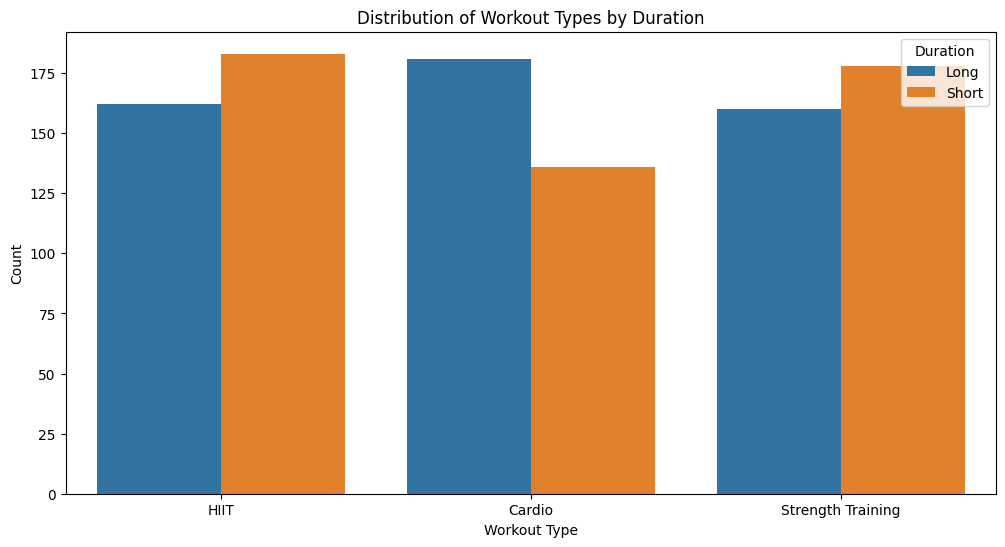

In [5]:
# Distrubtion of Workout Types

df['Duration_Category'] = np.where(df['Workout_Duration'] < 60, 'Short', 'Long')

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Workout_Type', hue= 'Duration_Category')
plt.title('Distribution of Workout Types by Duration')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.legend(title='Duration')
plt.show()

Text(0.5, 0, 'Gender')

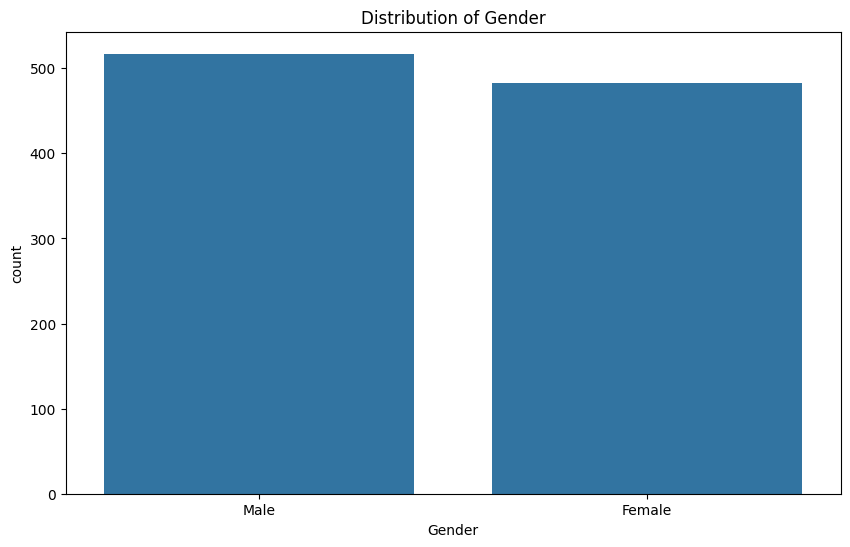

In [6]:
# Distribution of Gender

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

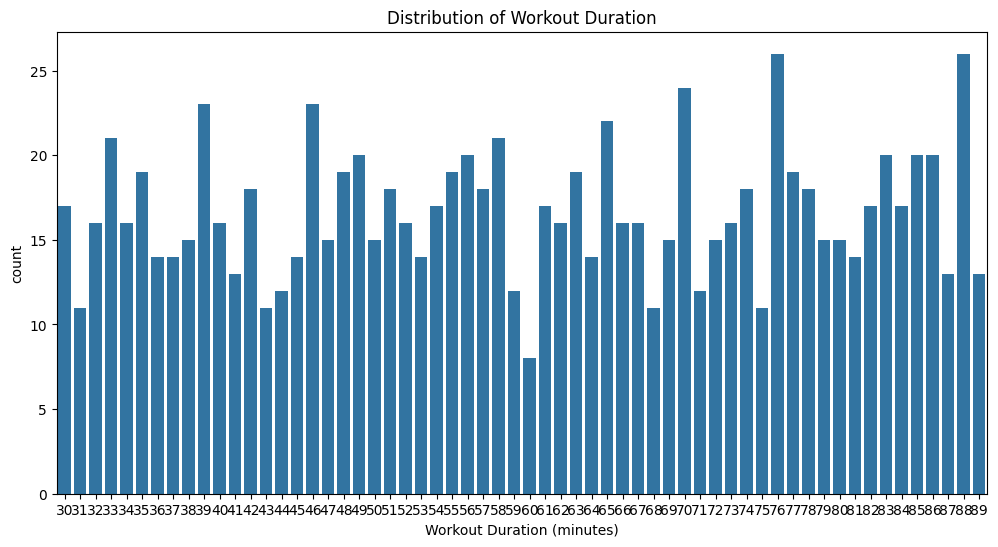

In [7]:
# Distribution of Workout Duration

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Workout_Duration')
plt.title('Distribution of Workout Duration')
plt.xlabel('Workout Duration (minutes)')
plt.show()

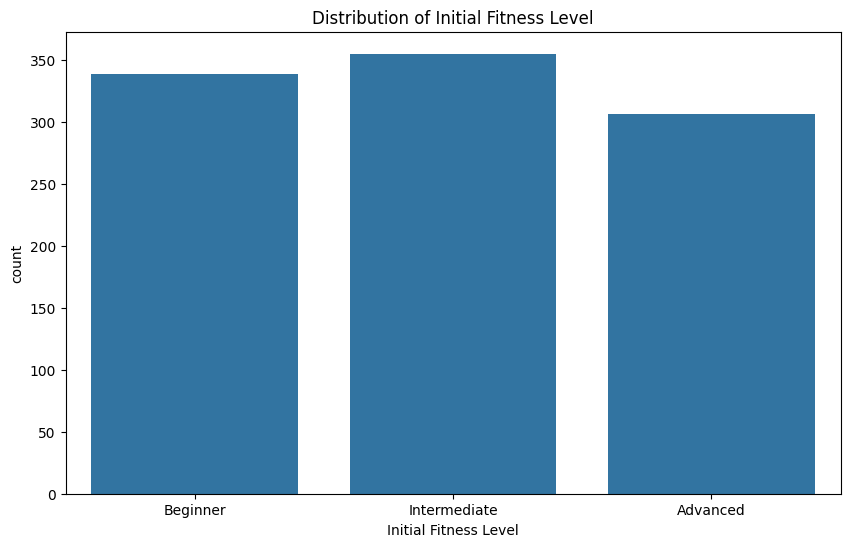

In [8]:
# Distribution of Initial Fitness Level

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Initial_Fitness_Level')
plt.title('Distribution of Initial Fitness Level')
plt.xlabel('Initial Fitness Level')
plt.show()

In [9]:
df['Weight_Loss'] = df['Initial_Weight'] - df['Final_Weight']

In [10]:
average_weight_loss = df.groupby('Workout_Type')['Weight_Loss'].mean()
print(average_weight_loss)

Workout_Type
Cardio               1.740063
HIIT                -0.230725
Strength Training   -1.520710
Name: Weight_Loss, dtype: float64


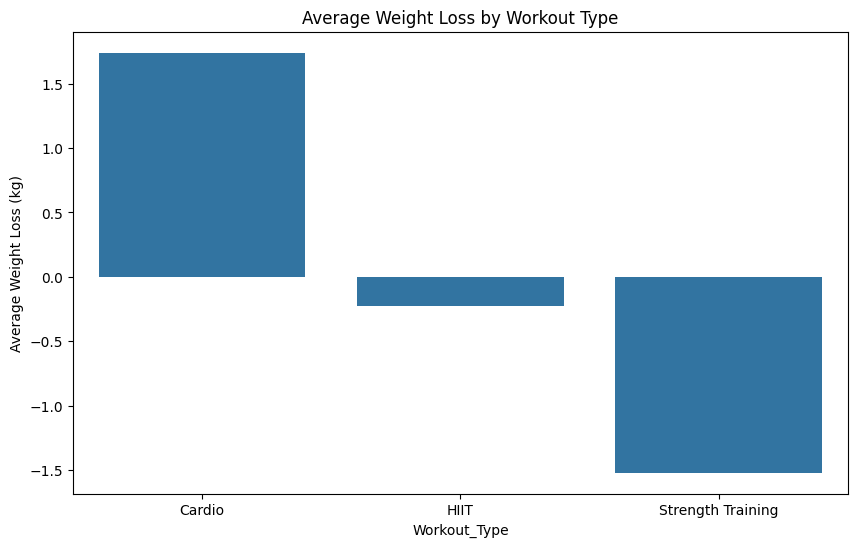

In [11]:
# Workout Type / Weight Loss

plt.figure(figsize=(10,6))
sns.barplot(x=average_weight_loss.index, y=average_weight_loss.values)
plt.title('Average Weight Loss by Workout Type')
plt.xlabel('Workout_Type')
plt.ylabel('Average Weight Loss (kg)')
plt.show()

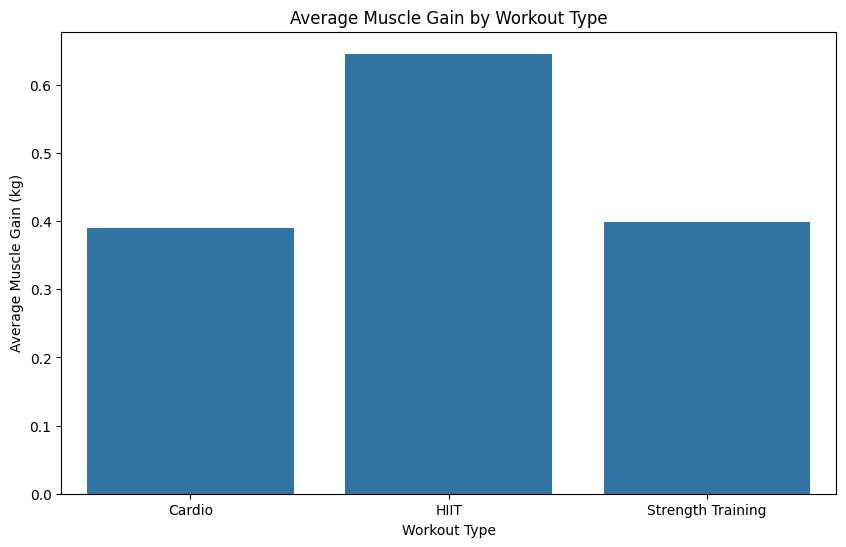

In [12]:
# Workout Type / Muscle Gain

df['Muscle_Gain'] = df['Final_Muscle_Mass'] - df['Initial_Muscle_Mass']
average_muscle_gain = df.groupby('Workout_Type')['Muscle_Gain'].mean()
average_muscle_gain

plt.figure(figsize=(10,6))
sns.barplot(x=average_muscle_gain.index, y=average_muscle_gain.values)
plt.title('Average Muscle Gain by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Average Muscle Gain (kg)')
plt.show()

In [13]:
df = pd.get_dummies(df, columns=['Gender', 'Workout_Type', 'Initial_Fitness_Level', 'Workout_Intensity','Duration_Category'])

In [14]:
df = df.drop(['Client_ID'], axis=1)

##Machine Learning

In [20]:
X = df.drop(['Weight_Loss', 'Muscle_Gain'], axis=1)
y = df[['Weight_Loss', 'Muscle_Gain']]

In [23]:
model = LinearRegression()
model.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.2519611545928325e-27
R-squared: 1.0


In [15]:
 # Is there statistical significance between Fat Lost and Muscle Mass Gained?